In [1]:
# download s&p 500 data
import yfinance as yf # call yahoo finance api to download daily finance prices

In [2]:
# initialize ticker class to allow us to download price history for a single symbol
sp500 = yf.Ticker("^GSPC")

In [3]:
# query historical prices
sp500 = sp500.history(period="max") # max data allows us to query from the beginning of the index

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,0.0,0.0
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,0.0,0.0
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,0.0,0.0


<Axes: xlabel='Date'>

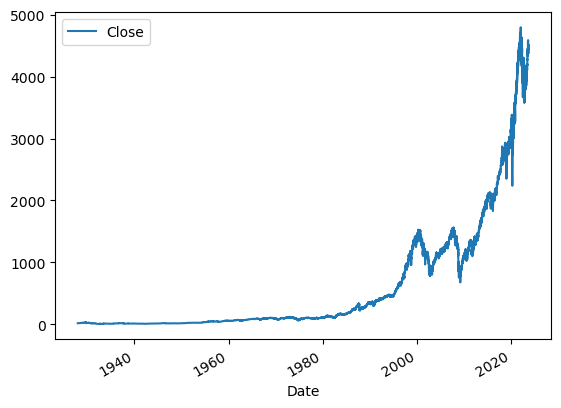

In [5]:
# clean up data
sp500.plot.line(y="Close", use_index=True) # show the day as the index and then the closing price. 

In [6]:
# remove unnecessary columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
# setup target - machine learning
# don't want to predict actual price because it doesn't inform us about directionality which is more important
# buy low sell high
# need to know if the stock will go up or down - this is the target
sp500["Tomorrow"] = sp500["Close"].shift(-1) # takes the close column and shifts back one day so each day shows tmrw

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,4451.140137
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,4457.490234
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961


In [9]:
# now set up the target - what we are going to predict with ML - is tmrw's price greater than today's price?
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,4451.140137,0
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,4457.490234,1
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961,1


In [11]:
# remove data that probably isn't as useful since it's old
sp500 = sp500.loc["1990-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,4451.140137,0
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,4457.490234,1
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961,1


In [13]:
# start training first ML model
from sklearn.ensemble import RandomForestClassifier
# n estimators is individual amount of decision trees, higher = better, 
# min samples split protect against overfitting, HIGHER = LESS ACCURATE, LESS OVERFIT
# random state - if we run the same model twice the random numbers will be predictable using 1, get same results
# random state helps if we change smth for the better we know its not cause of a random change
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# split into train and test sets
# WHAT ARE TIME SERIES DATA AND CROSS VALIDATION?

train = sp500.iloc[:-100] # all but last 100 rows in training
test = sp500.iloc[-100:] # only last 100 rows in test
# predictors - specify the columns you use for prediction - don't use tomorrow or target because you cant let
# the model know the future
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [15]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [16]:
preds

Date
2023-04-20 00:00:00-04:00    1
2023-04-21 00:00:00-04:00    1
2023-04-24 00:00:00-04:00    0
2023-04-25 00:00:00-04:00    1
2023-04-26 00:00:00-04:00    0
                            ..
2023-09-06 00:00:00-04:00    0
2023-09-07 00:00:00-04:00    1
2023-09-08 00:00:00-04:00    0
2023-09-11 00:00:00-04:00    1
2023-09-12 00:00:00-04:00    1
Length: 100, dtype: int64

In [17]:
precision_score(test["Target"], preds)

0.5

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

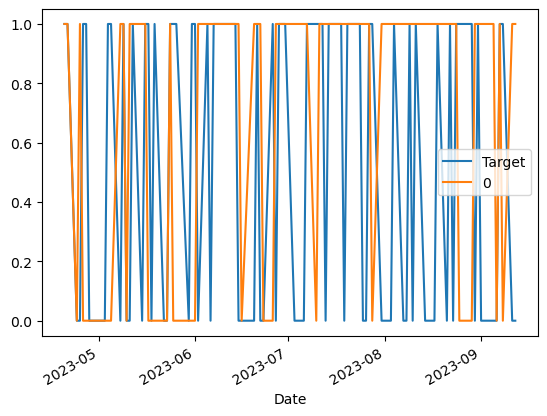

In [19]:
combined.plot()

In [20]:
# building a backtesting system - allows us to test our function

# first task - create a prediction function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

0    3435
1    2554
Name: Predictions, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52858261550509

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533645
0    0.466355
Name: Target, dtype: float64

In [26]:
# adding additional predictors to the model
# horizons - comparing to two days ago or a week ago and so on to predict up or down
horizons = [2,5,60,250,1000]
# list of new predictors
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    # create ratio column and add it to dataframe
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [27]:
sp500 = sp500.dropna()

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05 00:00:00-04:00,4510.060059,4514.290039,4496.009766,4496.830078,3526250000,4465.479980,0,0.997899,1.0,0.997843,3.0,1.009300,32.0,1.099782,122.0,1.164868,531.0
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,4451.140137,0,0.996502,0.0,0.992302,2.0,1.001639,31.0,1.091596,121.0,1.156308,531.0
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,4457.490234,1,0.998392,0.0,0.991925,1.0,0.998004,30.0,1.087617,120.0,1.152163,530.0


In [29]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtest(sp500, model, new_predictors)

In [32]:
predictions["Predictions"].value_counts()

0.0    4166
1.0     822
Name: Predictions, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5693430656934306

In [ ]:
# Future To-Dos
# correlate with other markets
# news like inflation and stuff
# key stocks and key industries
# increase resolution - hourly data, minute by minute data